# Exploration of products.csv

In [1]:
import pandas as pd

In [2]:
#url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing" # orderlines.csv
#url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=sharing" # orders.csv
url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=sharing" # products.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_original = pd.read_csv(path)

#MAKE A COPY
products = products_original.copy()

## Check size, data-types and missing values with  .shape and .info()

In [9]:
products.shape 

(19326, 7)

In [10]:
products.sku.nunique()

10579

In [11]:
products.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [52]:
products.isna().sum()

sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

**INFO:**
- There are 19,326 products (rows) and 7 columns
- 'sku' is not unique ! 
- Missing values in 'desc' - the description column (<10 values)
- Usually the id would rather be of type int. --> but it is alphanumerical, therefore the type is correct.


**FLAG: 'sku' is by far not unique! - There are missing prices! - 'price' is type object**
- There are only 10579 unique product-ids (column sku) and in total 19,000 entries. Do we have duplicates?
- Missing values in 'price' (46 values missing) and 'type' (50 values missing)
- 'price' and 'promo_price' are type object - I'd have expected float!



## Check raw data with .head() and .tail()

In [14]:
products.tail(20)

,sku,name,desc,price,promo_price,in_stock,type
19306,REP0429,iPhone Speaker lower repair 7 plus,Repair service including parts and labor for i...,599.906,599.906,0,"1,44E+11"
19307,REP0418,iPhone charging connector repair,Repair service including parts and labor for i...,49.99,499.899,0,"1,44E+11"
19308,REP0406,battery repair iPad Air,Battery Repair Service includes parts and labo...,6.999.003,69.99,0,"1,44E+11"
19309,ICA0115,"Incase City Brief case MacBook Pro 13 ""Black",Incase bag to carry Apple MacBook Pro 13-inch,79.95,739.903,1,10230
19310,REP0430,iPad Speaker lower repair,Repair service including parts and labor for iPad,6.999.003,69.99,0,"1,44E+11"
19311,REP0427,Wi-Fi antenna repair Apple iPad,Repair service including parts and labor for iPad,6.999.003,69.99,0,"1,44E+11"
19312,REP0424,Input repair Headphones iPad,Repair service including parts and labor for iPad,6.999.003,69.99,0,"1,44E+11"
19313,REP0421,iPad charging connector repair,Repair service including parts and labor for iPad,6.999.003,69.99,0,"1,44E+11"
19314,REP0416,iPad front camera repair,Repair service including parts and labor for iPad,6.999.003,69.99,0,"1,44E+11"
19315,REP0413,repair rear camera iPad,Repair service including parts and labor for iPad,6.999.003,69.99,0,"1,44E+11"


In [15]:
products.loc[
    (products.type == '1,44E+11') 
 #   & products.price contains the regex-pattern [/d+./d+./d+]
    :
]

,sku,name,desc,price,promo_price,in_stock,type
362,REP0043,Speaker lower repair iPhone 4,Repair service including parts and labor for i...,499.004,499.004,0,"1,44E+11"
369,REP0036,Full screen repair iPhone 4,Repair service including parts and labor for i...,49.99,499.899,0,"1,44E+11"
370,REP0040,Home button repair iPhone 4,Repair service including parts and labor for i...,49.99,499.899,0,"1,44E+11"
371,REP0041,battery repair iPhone 4,Repair service including parts and labor for i...,29.99,29.99,0,"1,44E+11"
372,REP0045,iPhone 4 Rear Camera Repair,Installation service includes parts and labor ...,49.99,499.899,0,"1,44E+11"
...,...,...,...,...,...,...,...
19315,REP0413,repair rear camera iPad,Repair service including parts and labor for iPad,6.999.003,69.99,0,"1,44E+11"
19316,REP0407,iPad battery repair,Repair service including parts and labor for iPad,6.999.003,69.99,0,"1,44E+11"
19317,REP0403,iPad LCD screen repair,Repair service including parts and labor for iPad,159.99,1.599.898,0,"1,44E+11"
19318,REP0402,iPad touch screen repair,Repair service including parts and labor for iPad,139.99,1.399.897,0,"1,44E+11"





**INFO:**
- promo_price is almost 10 times higher than the usual price. It could be the price for buying 10 items. 
- In the head()-section most products have 'in_stock = 0'. Only a 3 items of 20 have in_stock = 1. --> Check distribution of 'in_stock'
- the column 'type' contains numbers. Among the first 20 rows there are either 4 digit numbers or 8 digit numbers. 
- the 'sku' has 3 letters, followed by a 4 digit number. 
- entries in 'name' are relatively long and have special characters like / and '' and ()



**FLAG: 'price = 6.999.003 does not work' - column 'type' Value 1,44E+10 - price and promocode are sometimes equal**
- the column 'type' has difficult integers. Some values in the tail have e-numbers. 1,44E+11 appears several times within the last 20 rows --> There are 235 rows with this pattern, Seems mainly to happen with sku's starting with REP
- sometimes the price and the promo_price are equal


## Explore numerical columns with .hist and .describe()

array([[<AxesSubplot:title={'center':'in_stock'}>]], dtype=object)

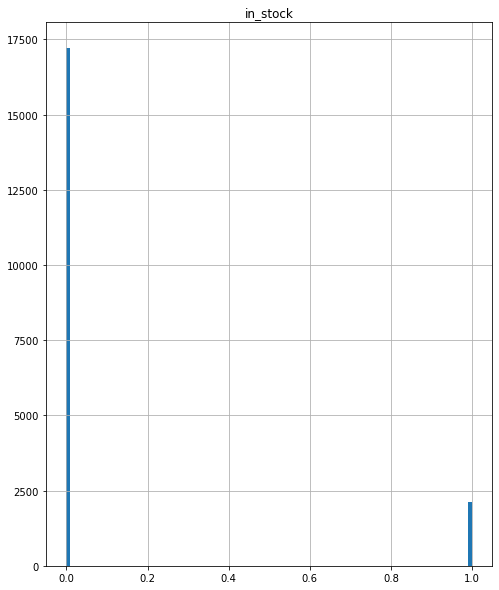

In [23]:
products.hist(bins = 100, figsize= (8,10))

In [25]:
products.describe()

,in_stock
count,19326.000000
mean,0.109593
std,0.312390
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**INFO:**
- The products "in_stock" is mainly 0 - for about 17,000 products, and 1 for the remaining 2,000 products
- could be converted into a boolean value. But then most products are out of stock? --> confirmed with Ben: YES it is a boolean in_stock = 1 means in_stock = True

**TODO:**
- converting column "in_stock" to boolean



In [26]:
#orders.nlargest(100, "total_paid")

## Explore categorical columns with value_counts() and .plot.bar()

In [42]:

# 0   sku          19326 non-null  object
# 1   name         19326 non-null  object
# 2   desc         19319 non-null  object
# 3   price        19280 non-null  object
# 4   promo_price  19326 non-null  object
# 6   type         19276 non-null  object


#column sku
skus = products.sku.value_counts()
print(skus)
skus.count()
#skus.plot.bar(figsize = (15,18)) # doesn't work - 10,000 entries
#order_states.plot.bar()

PAC1032      58
PAC1035      58
PAC1036      58
PAC1034      58
PAC1033      58
             ..
XDO0009-A     1
PAC1748       1
FIT0022-A     1
OWC0195       1
PAC2382       1
Name: sku, Length: 10579, dtype: int64


10579

<AxesSubplot:>

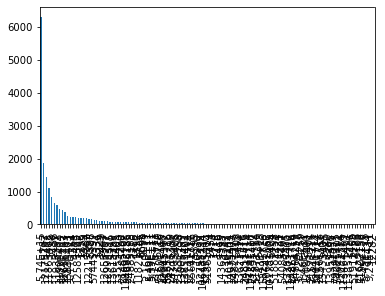

In [46]:
# column type
type_expl = products.type.value_counts()
type_expl.count()
type_expl.plot.bar()

In [48]:
#column price
price_expl = products.price.value_counts()
price_expl.count()

2690

In [50]:
promo_price_expl = products.promo_price.value_counts()
promo_price_expl.count()

4614

**INFO:**
- The sku's that appear the most often appear 58 times and all start with PAC103 (at least the first 5 rows)
- There is one value of 'type' that appears more than 6000 times and at least half the types are assigned only very few times. 
- In the first 1/6th of the types most products are grouped there.
- from 19.000 rows we have different 2690 prices and 4614 promo_prices



**FLAG: The calculation for prices needs to be redone when the column is changed to numerical! - And the calculation for type can be redone when the column is converted to type**